# Baging and Pasting 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Ganesh Jaiswar\Desktop\ODINSCHOOL\EDA AND ML\Titanic\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data=df.copy()

In [4]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Fill Missing Value

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
em=data['Embarked'].mode()[0]
em

'S'

<Axes: xlabel='Age', ylabel='Count'>

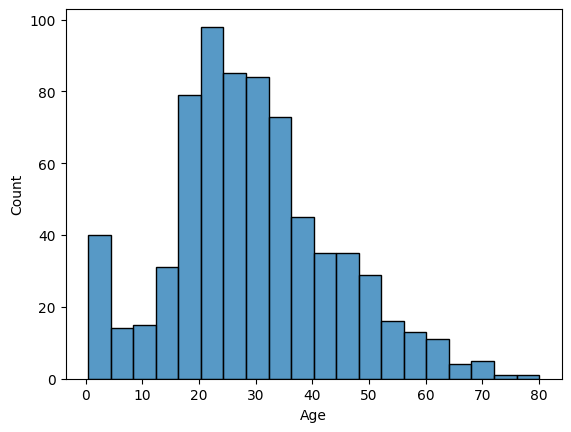

In [7]:
sns.histplot(data=data,x='Age')

In [8]:
Ag=data['Age'].median()
Ag

28.0

In [9]:
data['Age'].fillna(Ag,axis=0,inplace=True)

In [10]:
data['Embarked'].fillna(em,axis=0,inplace=True)

In [11]:
data[['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

# Encoding Method

In [12]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
cols=data[['Sex','Embarked']]

for col in cols:
    
    data[col]=Le.fit_transform(data[col])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [13]:
x=data[['PassengerId','Pclass','Sex','Age','SibSp','Embarked']]
y=data['Survived']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Model Selection

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [24]:
bag=BaggingClassifier(base_estimator=DecisionTreeClassifier(),oob_score=True,random_state=42,n_estimators=100) 

In [25]:
bag.fit(X_train,y_train)

C:\Users\Ganesh Jaiswar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=42)

In [ ]:
predt=bag.predict(X_test)

# Evaluate Method

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,classification_report


In [ ]:
obb_scor=bag.oob_score_
obb_scor

In [ ]:
ac=accuracy_score(predt,y_test)
ac

In [ ]:
ps=precision_score(predt,y_test)
ps

In [ ]:
rs=recall_score(predt,y_test)
rs

In [ ]:
f1=f1_score(predt,y_test)
f1

In [ ]:
rc=roc_auc_score(predt,y_test)
rc

In [ ]:
cm=confusion_matrix(predt,y_test)
cm

In [ ]:
cr=classification_report(predt,y_test)
cr

In [ ]:
residual = (predt-y_test)
residual